In [1]:
import copy
import numpy as np
import lammps_logfile
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
fontsize = 15
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

In [4]:
log = lammps_logfile.File("log.lammps")
print(log.keywords)

['Step', 'Temp', 'TotEng', 'Press', 'Volume', 'v_qSi', 'v_qO']


In [5]:
step = log.get("Step")
qSi = log.get("v_qSi")
qO = log.get("v_qO")

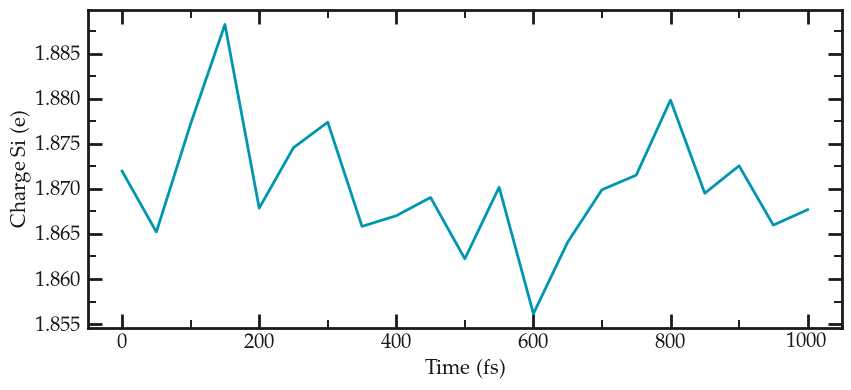

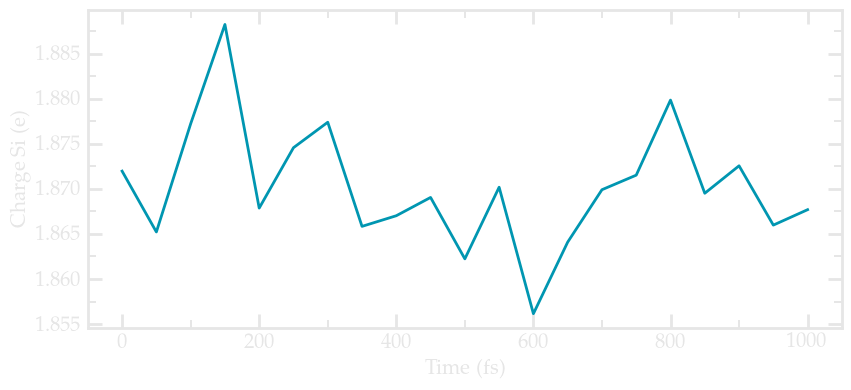

In [6]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(24, 4))
    ax1 = fig.add_subplot(131)
    plt.plot(step/2, qSi, linewidth = 2, color=myblue)
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel(r'Time (fs)', fontdict=font)
    ax1.set_ylabel(r'Charge Si (e)', fontdict=font)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    #ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        pass
        plt.savefig('average-charge-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reaxff/average-charge-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        pass
        plt.savefig('average-charge-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reaxff/average-charge-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()